<a href="https://colab.research.google.com/github/9mithun9/customer-churn-prediction-app/blob/main/Telco_Customer_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Downloading Data and Dependencies**


*   data has been doanloaded from a kaggle resource: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
*   other dependencies are also been downloaded here



In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mehedferewrfs
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


100%|██████████| 172k/172k [00:00<00:00, 332MB/s]

In [5]:
data_dir = 'telco-customer-churn'

In [6]:
import pandas as pd
import os

In [7]:
df = pd.read_csv(os.path.join(data_dir,'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

In [8]:
len(df)

7043

In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1448,2958-NHPPS,Male,0,No,No,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.85,473.9,No
6995,7164-BPTUT,Male,0,No,Yes,57,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.55,5012.35,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
1849,0621-TWIEM,Male,0,No,No,10,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.55,402.6,Yes
5767,1972-XMUWV,Female,0,Yes,No,65,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),59.80,3808.2,No


In [9]:
df.to_csv('data.csv', index=False)

**Data Exploration**


*   Unnecessary columns have been dropped
*   Converting the Yes/No, Male/Female to 1,0
*   Dropped the rows with missing values
*   Having some visualization to relate between columns







In [ ]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [ ]:
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [ ]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen']


In [ ]:
for col in binary_cols:
  df[col] = df[col].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-14-1556447478.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


In [ ]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='TotalCharges', color='Churn')
fig.update_layout(title='Churn Rate by Gender')
fig.show()

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
print(df['TotalCharges'].isnull().sum())

11


In [ ]:
df.dropna(subset=['TotalCharges'], inplace=True)
len(df)

7032

**One Hot Encoding**

*   Applying pandas get_dummies for one-hot encoding
*   Categorical columns: InternetService, Contract, PaymentMethod



In [ ]:
cat_cols = ['InternetService', 'Contract', 'PaymentMethod']

In [ ]:
df = pd.get_dummies(df, columns=cat_cols)

**Scaling**


*   applying MinMax Scaling on the numerical column
*   Numerical columns: MonthlyCharges, TotalCharges, tenure



In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
input_cols = df.columns.tolist()
input_cols.remove('Churn')
target_col = 'Churn'

**Train-Test Split**

*   using 20% of the data as *test*



In [ ]:
from sklearn.model_selection import train_test_split

x = df[input_cols]
y = df[target_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_test.shape

(1407, 26)

**Creation of Model**


*   A dense neural network has been created
*   It has a hidden layer and using relu, sigmoid as activation fucntion



In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(x_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7344 - loss: 0.5426
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7859 - loss: 0.4484
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.4221
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7993 - loss: 0.4175
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8084 - loss: 0.4105
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8083 - loss: 0.4137
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8037 - loss: 0.4202
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8139 - loss: 0.3983
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8085 - loss: 0.4131
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8044 - loss: 0.4156
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7981 - loss: 0.4135
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

In [ ]:
model.evaluate(x_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7642 - loss: 0.4729


[0.47524502873420715, 0.7704335451126099]

In [ ]:
y_predict = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_predict = (y_predict > 0.5).astype(int).flatten()

**Evaluation and Visualization**


*   evaluating the prediction on several metrices
*   for visualization a confusion_matrix has been created



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.57      0.53      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



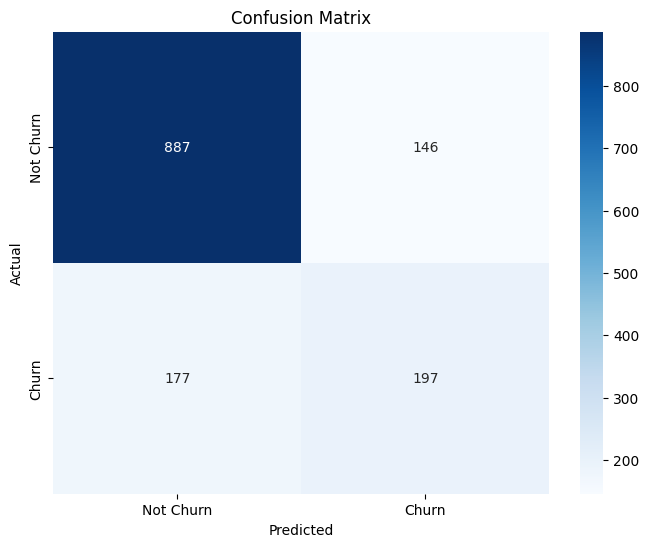

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df[:2000].to_csv('data.csv', index=False)